In [132]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
qualifications_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Qualifications-of-16-64-aged.csv"
child_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Children-protection-plan-per-borough.csv"
economic_inactivity_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Economic_inactivity.csv"
fly_tipping_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\fly-tipping-borough.csv"
tree_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Tree_list_per_borough.csv"
stop_and_search_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\stop_and_search_data"
crime_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\metropolitan_outcomes_data_with-boroughs.csv"

In [3]:
london_boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley",
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney",
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea",
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham",
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton",
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

In [4]:
df_qualifications = pd.read_csv(qualifications_path)
df_child = pd.read_csv(child_path)
df_economic_inactivity = pd.read_csv(economic_inactivity_path)
df_fly_tipping = pd.read_csv(fly_tipping_path)
df_trees = pd.read_csv(tree_path)
df_crime = pd.read_csv(crime_path)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8292\2448922259.py:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trees = pd.read_csv(tree_path)


In [ ]:
df_qualifications

In [31]:
df_child

In [ ]:
df_economic_inactivity

In [ ]:
df_fly_tipping

In [ ]:
df_trees

In [5]:
df_crime["Year"] = df_crime["Month"].str[:4]
df_crime["month"] = df_crime["Month"].str[-2:]

In [6]:
#Only needed boroughs
#df_child = df_child[df_child["Area"].isin(london_boroughs)]
df_economic_inactivity = df_economic_inactivity[df_economic_inactivity["Area"].isin(london_boroughs)]
df_fly_tipping = df_fly_tipping[df_fly_tipping["area"].isin(london_boroughs)]
df_qualifications = df_qualifications[df_qualifications["Area"].isin(london_boroughs)]
df_trees = df_trees[df_trees["borough"].isin(london_boroughs)]


In [7]:
columns_to_exclude = ["Area","Code"]

# Function to remove commas and convert to float
def convert_to_float(value):
    try:
        return float(value.replace(',', ''))
    except AttributeError:
        return value

# Apply the function to all columns except the ones excluded
for column in df_economic_inactivity.columns.difference(columns_to_exclude):
    df_economic_inactivity[column] = df_economic_inactivity[column].apply(convert_to_float)



In [8]:
shape_path = r'C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Shapefiles\statistical-gis-boundaries-london\ESRI\LSOA_2011_London_gen_MHW.shp'


In [9]:
def plot_unenmployment_year_percentage(shape_path, year, output_dir= r'C:\Users\Usuario\Desktop\TUE\Data Challenge 2\figs'):
    os.makedirs(output_dir, exist_ok=True)
    shape = gpd.read_file(shape_path) # just a dataframe under the hood
    shape.head() # first column represents LSOA CODE
    
    merged_data = shape.merge(df_economic_inactivity, left_on='LAD11NM', right_on='Area')
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_data.plot(column=f'percent; Jan {year}-Dec {year}',
                     cmap='coolwarm',
                     linewidth=0.8,
                     ax=ax, edgecolor='0.8')
    
    # Remove axis
    ax.set_axis_off()
    ax.set_title(f'Unemployment percent Jan {year}-Dec {year}', weight='bold')
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=13, vmax=41))
    sm._A = []
    fig.colorbar(sm, ax=ax, orientation='horizontal')
    
    plt.savefig(os.path.join(output_dir, f'unemployment_percentage_{year}.png'), bbox_inches='tight')
    plt.close(fig)  # Close the plot to free up memory

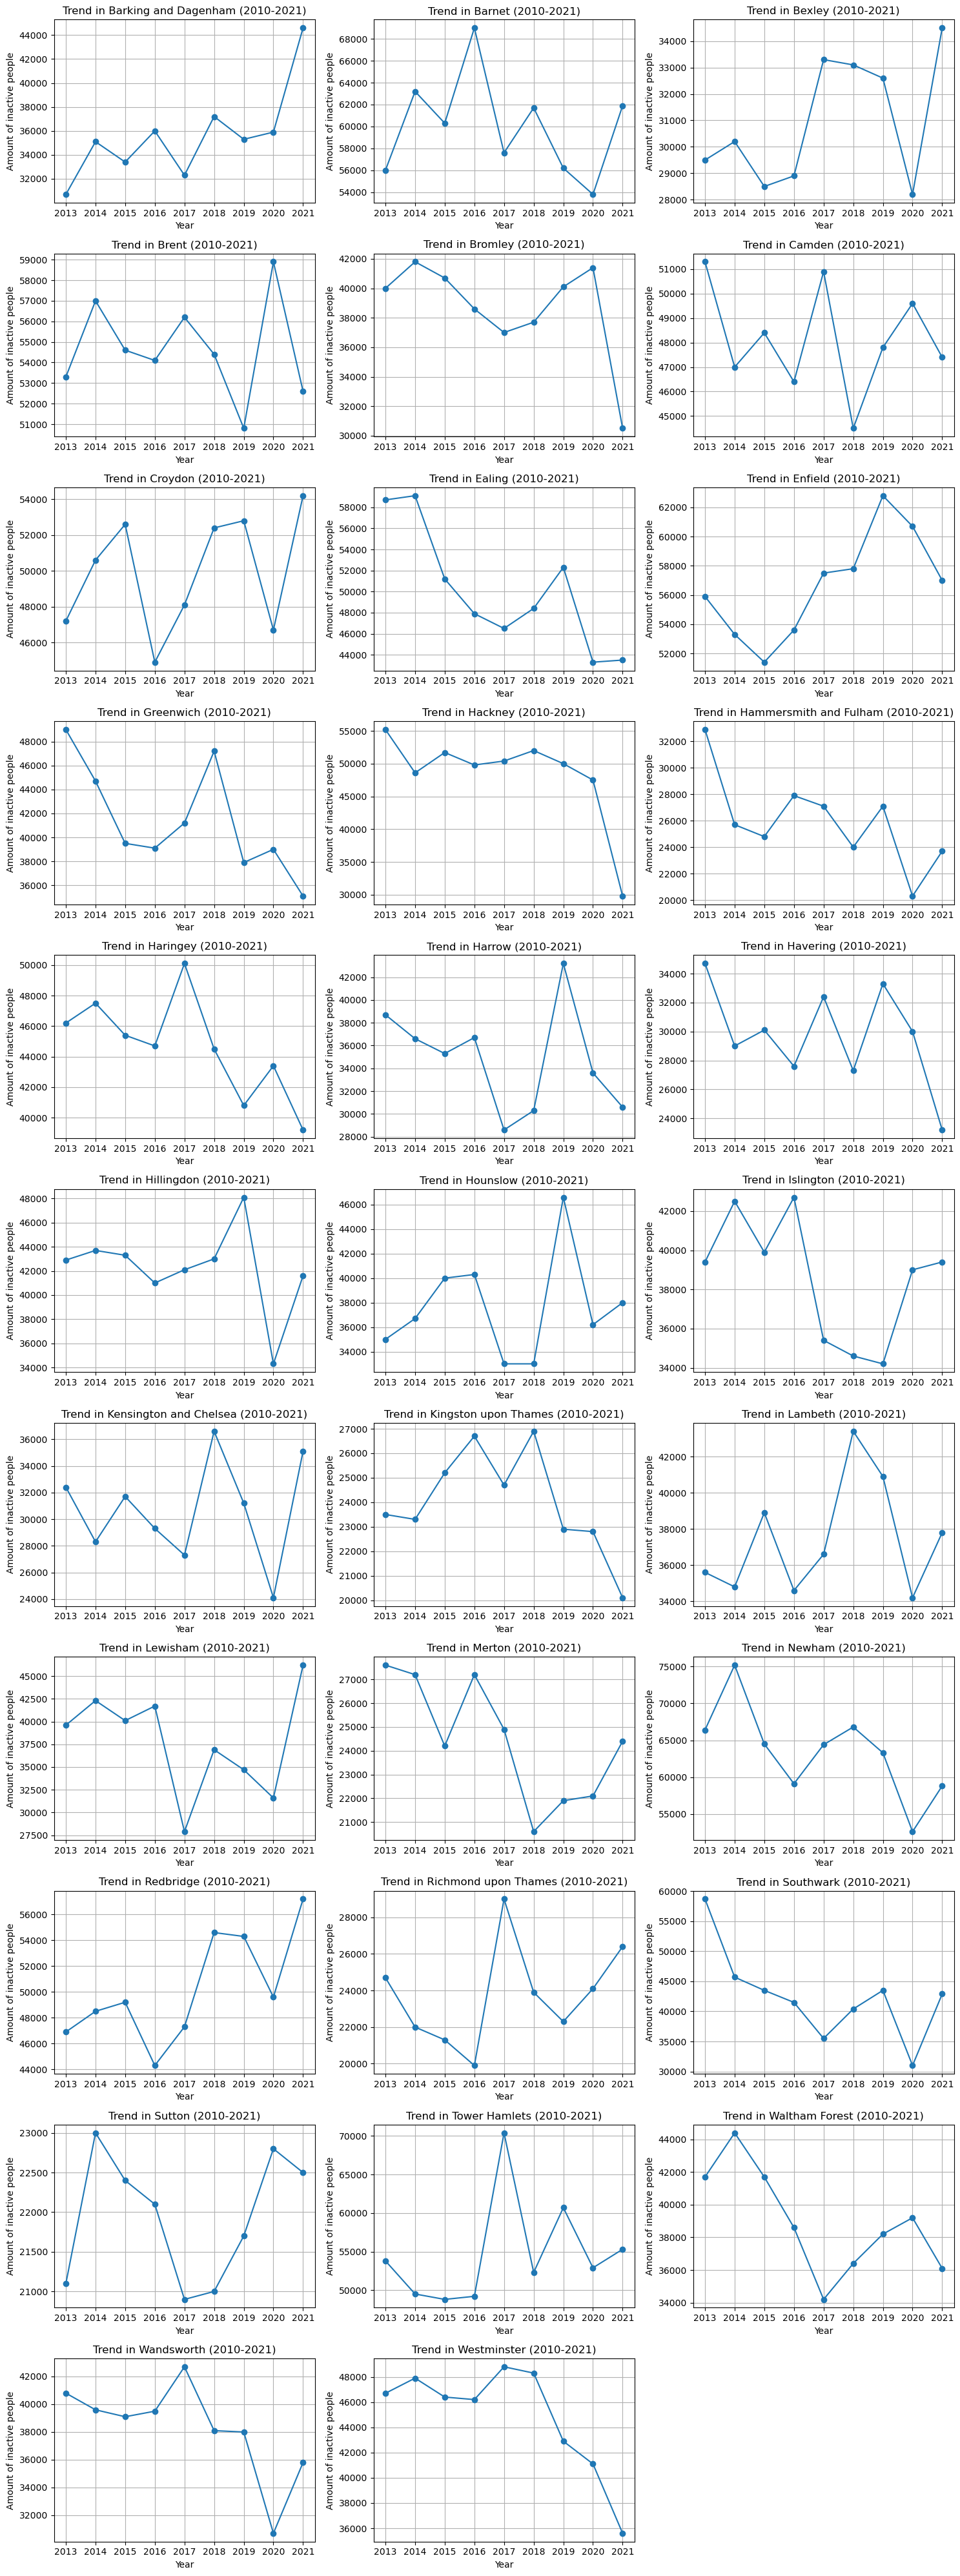

In [10]:
# Reshape the DataFrame from wide to long format
years = [f'Economically Inactive; Jan {year}-Dec {year}' for year in range(2013, 2022)]
data_long = pd.melt(df_economic_inactivity, id_vars=['Area', 'Code'], value_vars=years, var_name='Year', value_name='Count')
data_long['Year'] = data_long['Year'].str.extract('(\d+)').astype(int)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 40))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each borough and create a subplot
for i, borough in enumerate(london_boroughs):
    borough_data = data_long[data_long['Area'] == borough]
    borough_data = borough_data.sort_values('Year')
    
    ax = axes[i]
    ax.plot(borough_data['Year'], borough_data['Count'], marker='o', linestyle='-')
    ax.set_title(f'Trend in {borough} (2010-2021)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount of inactive people')
    ax.grid(True)
    ax.set_xticks(borough_data['Year'])  # Ensure all years are marked on x-axis

# Hide unused axes if any
for ax in axes[len(london_boroughs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
df_child = pd.read_csv(child_path)

In [12]:
header_row = 1

# Set the correct headers using the row that contains them
df_child.columns = df_child.iloc[header_row]

# Drop the row that was used as the header
df_child = df_child.drop(header_row)

# Reset the index after the row removal
df_child.reset_index(drop=True, inplace=True)

In [13]:
df_child = df_child[2:]

In [14]:
df_child = df_child[df_child["Area"].isin(london_boroughs)]

In [15]:
df_child = df_child.rename(columns= {2006:"2006",2013:"2013",2016:"2016",2019:"2019"})

In [27]:
df_crime["Area"] = df_crime["BoroughName"]


Unnamed: 0                                           Crime ID  \
0                 0  a844d2986672f8e7141424e629e3b45dcccae1143bdded...   
1                 1  750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...   
2                 2  21938f414ed8b80c3a02b659832702736a595a541d5574...   
3                 3  38a2922207338b6ff65203c3c292371402925a9651e2ea...   
4                 4  f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...   
...             ...                                                ...   
5323341     5323341  13cb7accfc6a4720a6bd3c3575700316923e660e50b843...   
5323342     5323342  53ac09d5d95b9d107cf3c29946a1b3d2c6ed3571156495...   
5323343     5323343  2c921d53b77d9ae322c5abcf6b565b175125d11c73afdb...   
5323344     5323344  25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...   
5323345     5323345  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...   

           Month  Longitude   Latitude                        Location  \
0        2013-01  -0.207076  51.492838   On or near NORTH END CRESCENT   
1        2013-01  -0.203552  51.491597        On or near Shopping Area   
2        2013-01  -0.213284  51.491764         On or near GLIDDON ROAD   
3        2013-01  -0.212671  51.493427          On or near AURIOL ROAD   
4        2013-01  -0.213284  51.491764         On or near GLIDDON ROAD   
...          ...        ...        ...                             ...   
5323341  2024-01  -0.293950  51.407267    On or near Kingsworthy Close   
5323342  2024-01  -0.245693  51.381789  On or near Lower Green Gardens   
5323343  2024-01  -0.297572  51.407680      On or near Fairfield South   
5323344  2024-01  -0.299881  51.380709         On or near Malvern Road   
5323345  2024-01  -0.301184  51.413811        On or near Walter Street   

         LSOA code                                   Outcome type  \
0        E01001870      Offender given a drugs possession warning   
1        E01001870  Investigation complete; no suspect identified   
2        E01001871  Investigation complete; no suspect identified   
3        E01001871                                Suspect charged   
4        E01001871  Investigation complete; no suspect identified   
...            ...                                            ...   
5323341  E01002971  Investigation complete; no suspect identified   
5323342  E01002978  Investigation complete; no suspect identified   
5323343  E01002964  Investigation complete; no suspect identified   
5323344  E01002994  Investigation complete; no suspect identified   
5323345  E01033569  Investigation complete; no suspect identified   

                           LSOA_Name             BoroughName  Year month  \
0        Hammersmith and Fulham 012D  Hammersmith and Fulham  2013    01   
1        Hammersmith and Fulham 012D  Hammersmith and Fulham  2013    01   
2        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01   
3        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01   
4        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01   
...                              ...                     ...   ...   ...   
5323341    Kingston upon Thames 005C    Kingston upon Thames  2024    01   
5323342    Kingston upon Thames 015B    Kingston upon Thames  2024    01   
5323343    Kingston upon Thames 005A    Kingston upon Thames  2024    01   
5323344    Kingston upon Thames 016A    Kingston upon Thames  2024    01   
5323345    Kingston upon Thames 004G    Kingston upon Thames  2024    01   

                           Area  
0        Hammersmith and Fulham  
1        Hammersmith and Fulham  
2        Hammersmith and Fulham  
3        Hammersmith and Fulham  
4        Hammersmith and Fulham  
...                         ...  
5323341    Kingston upon Thames  
5323342    Kingston upon Thames  
5323343    Kingston upon Thames  
5323344    Kingston upon Thames  
5323345    Kingston upon Thames  

[5323346 rows x 13 columns]

In [21]:
df_grouped_borough = df_crime.groupby(['Area', 'Year'])['Crime ID'].count().reset_index()
df_grouped_borough["Year"] = df_grouped_borough["Year"].astype(int)
data_long = data_long.merge(df_grouped_borough, on=['Area', 'Year'], how='left')

In [43]:
df_child_long = pd.melt(df_child, id_vars=['Code','Area'], var_name='Year', value_name='Value')

Code                  Area  Year Value
0     00AB  Barking and Dagenham  2005    48
1     00AC                Barnet  2005    16
2     00AD                Bexley  2005    25
3     00AE                 Brent  2005    17
4     00AF               Bromley  2005    21
...    ...                   ...   ...   ...
1147  00BF                Sutton  2022    40
1148  00BG         Tower Hamlets  2022    44
1149  00BH        Waltham Forest  2022    46
1150  00BJ            Wandsworth  2022    25
1151  00BK           Westminster  2022    19

[1152 rows x 4 columns]

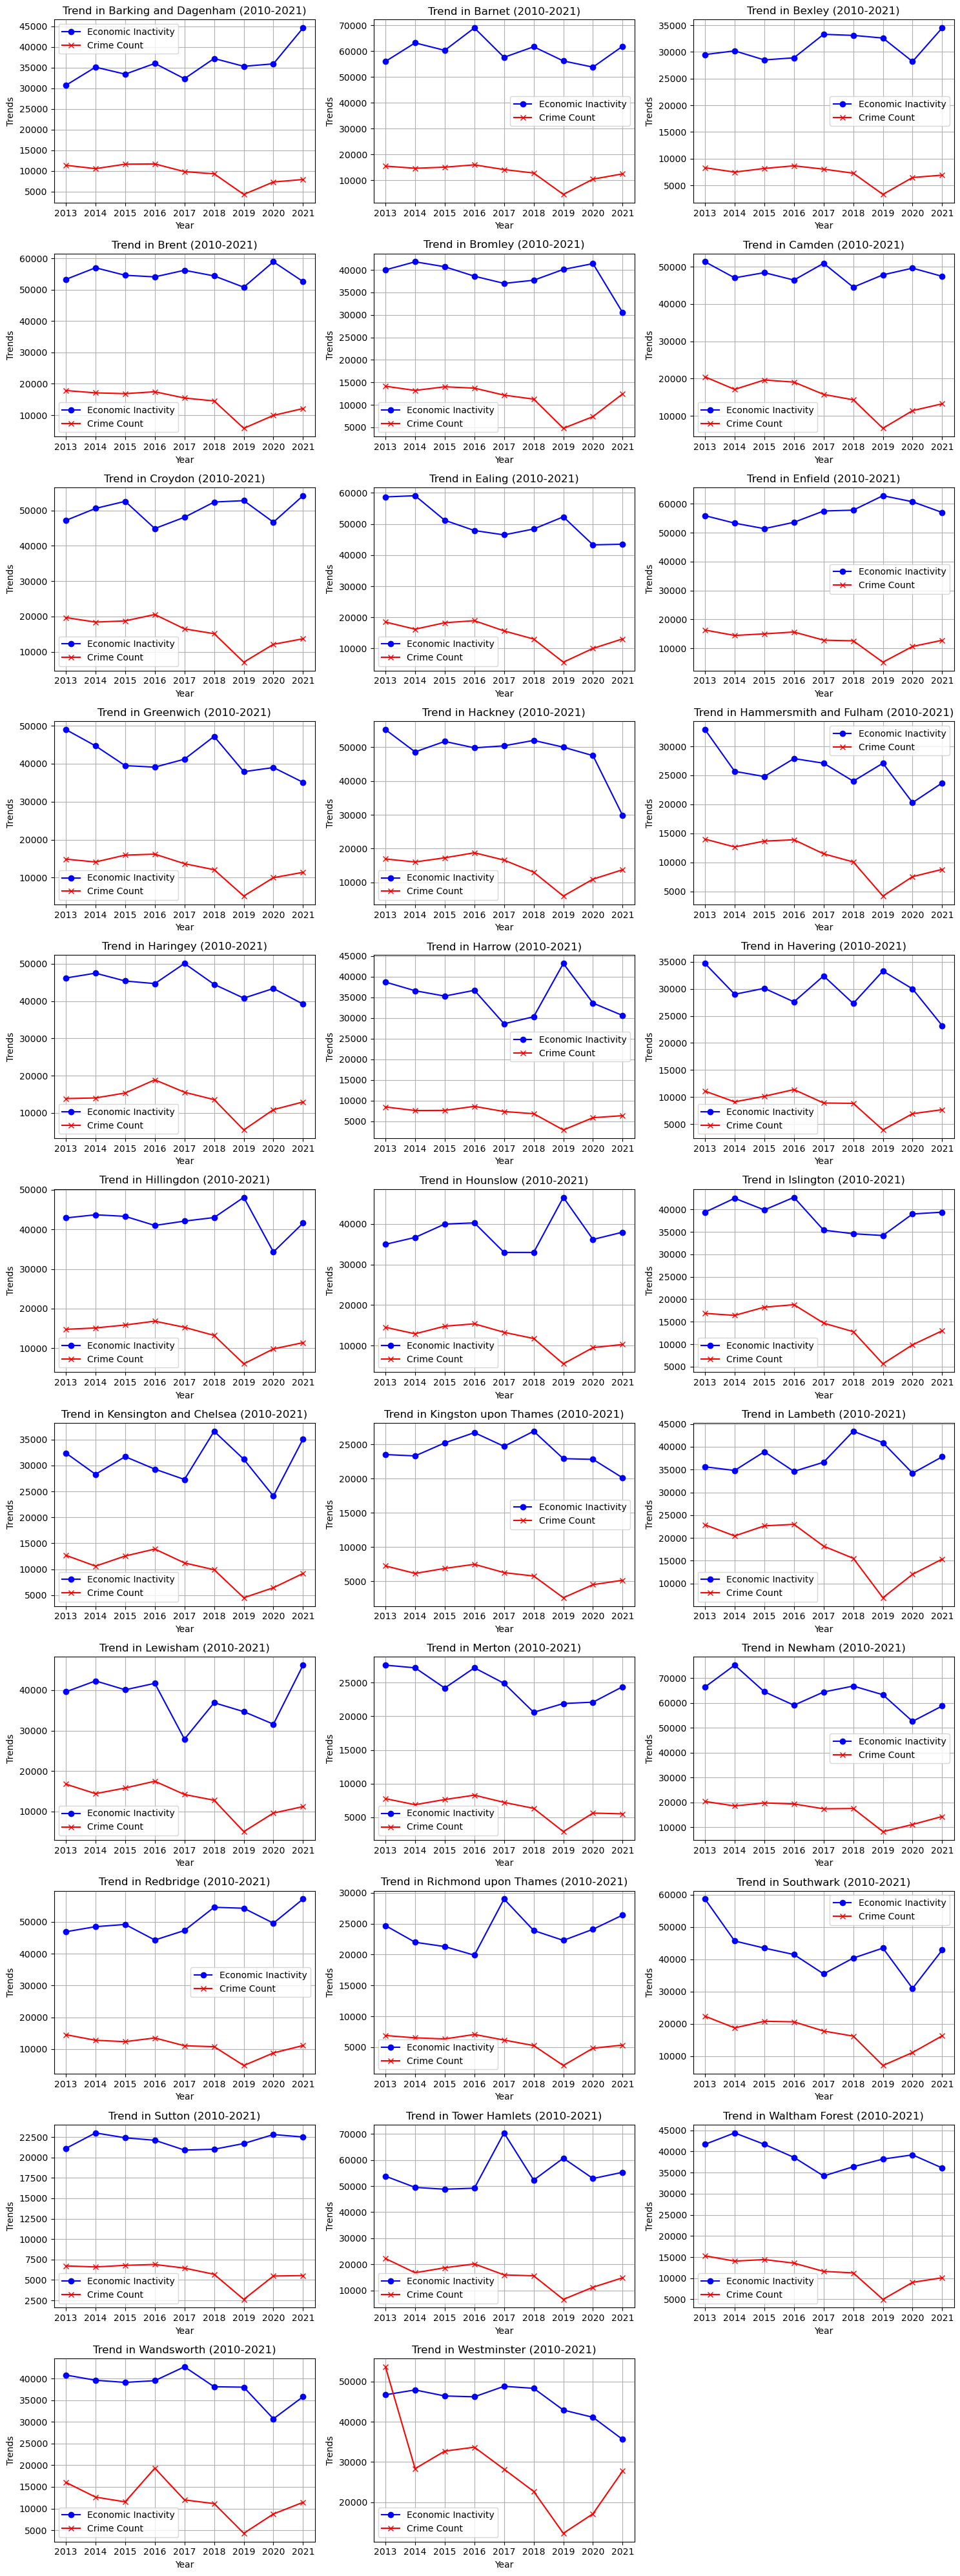

In [26]:
# Assuming df_crime is already in the long format with columns 'Area', 'Year', and 'Crime Count'
# Merge the economic inactivity data with the crime data

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 40))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each borough and create a subplot
for i, borough in enumerate(london_boroughs):
    borough_data = data_long[data_long['Area'] == borough]
    borough_data = borough_data.sort_values('Year')
    
    ax = axes[i]
    # Plot economic inactivity trend
    ax.plot(borough_data['Year'], borough_data['Count'], marker='o', linestyle='-', color='blue', label='Economic Inactivity')
    # Plot crime trend
    ax.plot(borough_data['Year'], borough_data['Crime ID'], marker='x', linestyle='-', color='red', label='Crime Count')
    
    ax.set_title(f'Trend in {borough} (2010-2021)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Trends')
    ax.grid(True)
    ax.set_xticks(borough_data['Year'].unique())  # Ensure all years are marked on x-axis
    ax.legend()

# Hide unused axes if any
for ax in axes[len(london_boroughs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig('Crimes vs economic inactivity.jpg', dpi=600)
plt.show()

In [80]:
merged_data = pd.merge(df_child_long, data_long, on=['Area', 'Year'], how='right')

In [91]:
df_child = df_child.iloc[:, :20]


1   Code                    Area 2005  2006 2007 2008 2009 2010 2011 2012  \
3   00AB    Barking and Dagenham   48  49.0   58   46   49   43   50   42   
4   00AC                  Barnet   16  19.0   20   23   24   31   26   30   
5   00AD                  Bexley   25  17.0   14   16   17   18   18   23   
6   00AE                   Brent   17  25.0   27   40   36    x   57   43   
7   00AF                 Bromley   21  27.0   21   21   27   39   48   27   
8   00AG                  Camden   47  61.0   53   57   68   61   67   54   
9   00AH                 Croydon   25  29.0   34   28   36   45   38   39   
10  00AJ                  Ealing   43  41.0   45   48   50   61   61   48   
11  00AK                 Enfield   32  33.0   25   24   33   30   34   36   
12  00AL               Greenwich   55  36.0   34   34   53   57   76   63   
13  00AM                 Hackney   31  23.0   45   48   45    x   27   45   
14  00AN  Hammersmith and Fulham   35  35.0   58   55   52   75   43   44   
15  00AP                Haringey   50  40.0   34   51   33   64   68   48   
16  00AQ                  Harrow   29  17.0   23   20   35   29   27   26   
17  00AR                Havering   26  33.0   17   21   22    x   26    x   
18  00AS              Hillingdon   30  24.0   32   32   33   41   36   59   
19  00AT                Hounslow   35  49.0   46   44   45   42   46   40   
20  00AU               Islington   51  54.0   39   42   45   39   43   41   
21  00AW  Kensington and Chelsea   20  21.0   22   25   38   40   33   36   
22  00AX    Kingston upon Thames    9  14.0   13   23   27   30   29   34   
23  00AY                 Lambeth   45  42.0   49   56   46   74   72   49   
24  00AZ                Lewisham   42  41.0   36   26   32   35   33   37   
25  00BA                  Merton   20  25.0   35   34   31   40   28   44   
26  00BB                  Newham   51  65.0   66   61   41   59   53   ..   
27  00BC               Redbridge   17  18.0   23   24   26    x   28   27   
28  00BD    Richmond upon Thames   18  17.0   14   12   11    8   12   14   
29  00BE               Southwark   39  50.0   48   49   60   60   53   49   
30  00BF                  Sutton   21  14.0   21   28   38   50   42   41   
31  00BG           Tower Hamlets   16  29.0   38   39   42   54   50   46   
32  00BH          Waltham Forest   25  35.0   32   23   31   36   34   35   
33  00BJ              Wandsworth   31  30.0   31   34   33   33   35   32   
34  00BK             Westminster   28  30.0   29   28   44   42   33   33   

1   2013 2014 2015  2016 2017 2018  2019 2020 2021 2022  
3   50.0   76   74  51.0   54   53  53.0   59   57   70  
4   27.0   29   31  35.0   29   27  27.0   22   20   26  
5   49.0   54   65  38.0   44   41  27.0   38   45   53  
6   29.0   37   34  33.0   43   51  45.0   43   46   53  
7   36.0   42   34  34.0   58   38  47.0   55   47   59  
8   53.0   63   58  55.0   57   62  55.0   50   58   34  
9   39.0   46   43  43.0   48   73  83.0   70   49   64  
10  45.0   53   52  38.0   37   40  29.0   32   38   33  
11  32.0   32   42  41.0   40   41  42.0   33   40   47  
12  74.0   41   49  49.0   52   52  32.0   37   33   32  
13  48.0   39   46  51.0   69   35  40.0   59    :    x  
14  50.0   60   57  39.0   37   51  54.0   46   34   42  
15  61.0   45   61  49.0   59   75  49.0   37   56   39  
16  26.0   44   42  48.0   60   56  57.0   66   64   62  
17  31.0   34   49  71.0   55   47  40.0   28   35   54  
18  32.0   31   56  67.0   63   76  69.0   44   41   41  
19  34.0   43   38  39.0   47   41  48.0   37   48   39  
20  37.0   47   48  47.0   61   66  53.0   48   48   40  
21  36.0   37   29  30.0   31   35  19.0   24   12   27  
22  50.0   37   53  44.0   50   40  35.0   59   41   37  
23  43.0   51   60  47.0   36   62  51.0   54   50   62  
24  44.0   51   56  55.0   56   57  54.0   48   49   69  
25  36.0   47   50  44.0   39   54  43.0   26   42   23  
26  40.0   37   52  50.0   46   45  41.0   49   47   49  
27  21.0

In [92]:
df_child_long = pd.melt(df_child, id_vars=['Code','Area'], var_name='Year', value_name='Value')

In [99]:
merged_data = pd.merge(df_child_long, data_long, on=['Area', 'Year'], how='right')

In [124]:
merged_data["Year"] = merged_data["Year"].astype(int)
merged_data["Count"] = merged_data["Count"].astype(int)
merged_data["Crime ID"] = merged_data["Crime ID"].astype(int)
merged_data["CPP Children"] = merged_data["CPP Children"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code          288 non-null    object
 1   Area          288 non-null    object
 2   Year          288 non-null    int32 
 3   CPP Children  288 non-null    int32 
 4   Count         288 non-null    int32 
 5   Crime ID      288 non-null    int32 
dtypes: int32(4), object(2)
memory usage: 9.1+ KB


In [136]:
scaler = StandardScaler()

# Reshape the column to a 2D array and scale it
merged_data["Crime Count transformed"] = scaler.fit_transform(merged_data["Crime ID"].values.reshape(-1, 1))

# Display the DataFrame to check the new column
merged_data

Code                  Area  Year  CPP Children  Count  Crime ID  \
0    00AB  Barking and Dagenham  2013            50  30700     11334   
1    00AC                Barnet  2013            27  56000     15443   
2    00AD                Bexley  2013            49  29500      8295   
3    00AE                 Brent  2013            29  53300     17862   
4    00AF               Bromley  2013            36  40000     14135   
..    ...                   ...   ...           ...    ...       ...   
283  00BF                Sutton  2021            69  22500      5536   
284  00BG         Tower Hamlets  2021            49  55300     14825   
285  00BH        Waltham Forest  2021            46  36100     10104   
286  00BJ            Wandsworth  2021            41  35800     11444   
287  00BK           Westminster  2021            14  35600     27748   

     Count transformed  CPP Children transformed  Crime Count transformed  
0            -0.860714                  0.353443                -0.173819  
1             1.325012                 -1.461446                 0.529478  
2            -0.964384                  0.274535                -0.693975  
3             1.091753                 -1.303629                 0.943514  
4            -0.057265                 -0.751272                 0.305601  
..                 ...                       ...                      ...  
283          -1.569131                  1.852699                -1.166206  
284           1.264538                  0.274535                 0.423701  
285          -0.394195                  0.037810                -0.384346  
286          -0.420113                 -0.356731                -0.154991  
287          -0.437391                 -2.487252                 2.635604  

[288 rows x 9 columns]

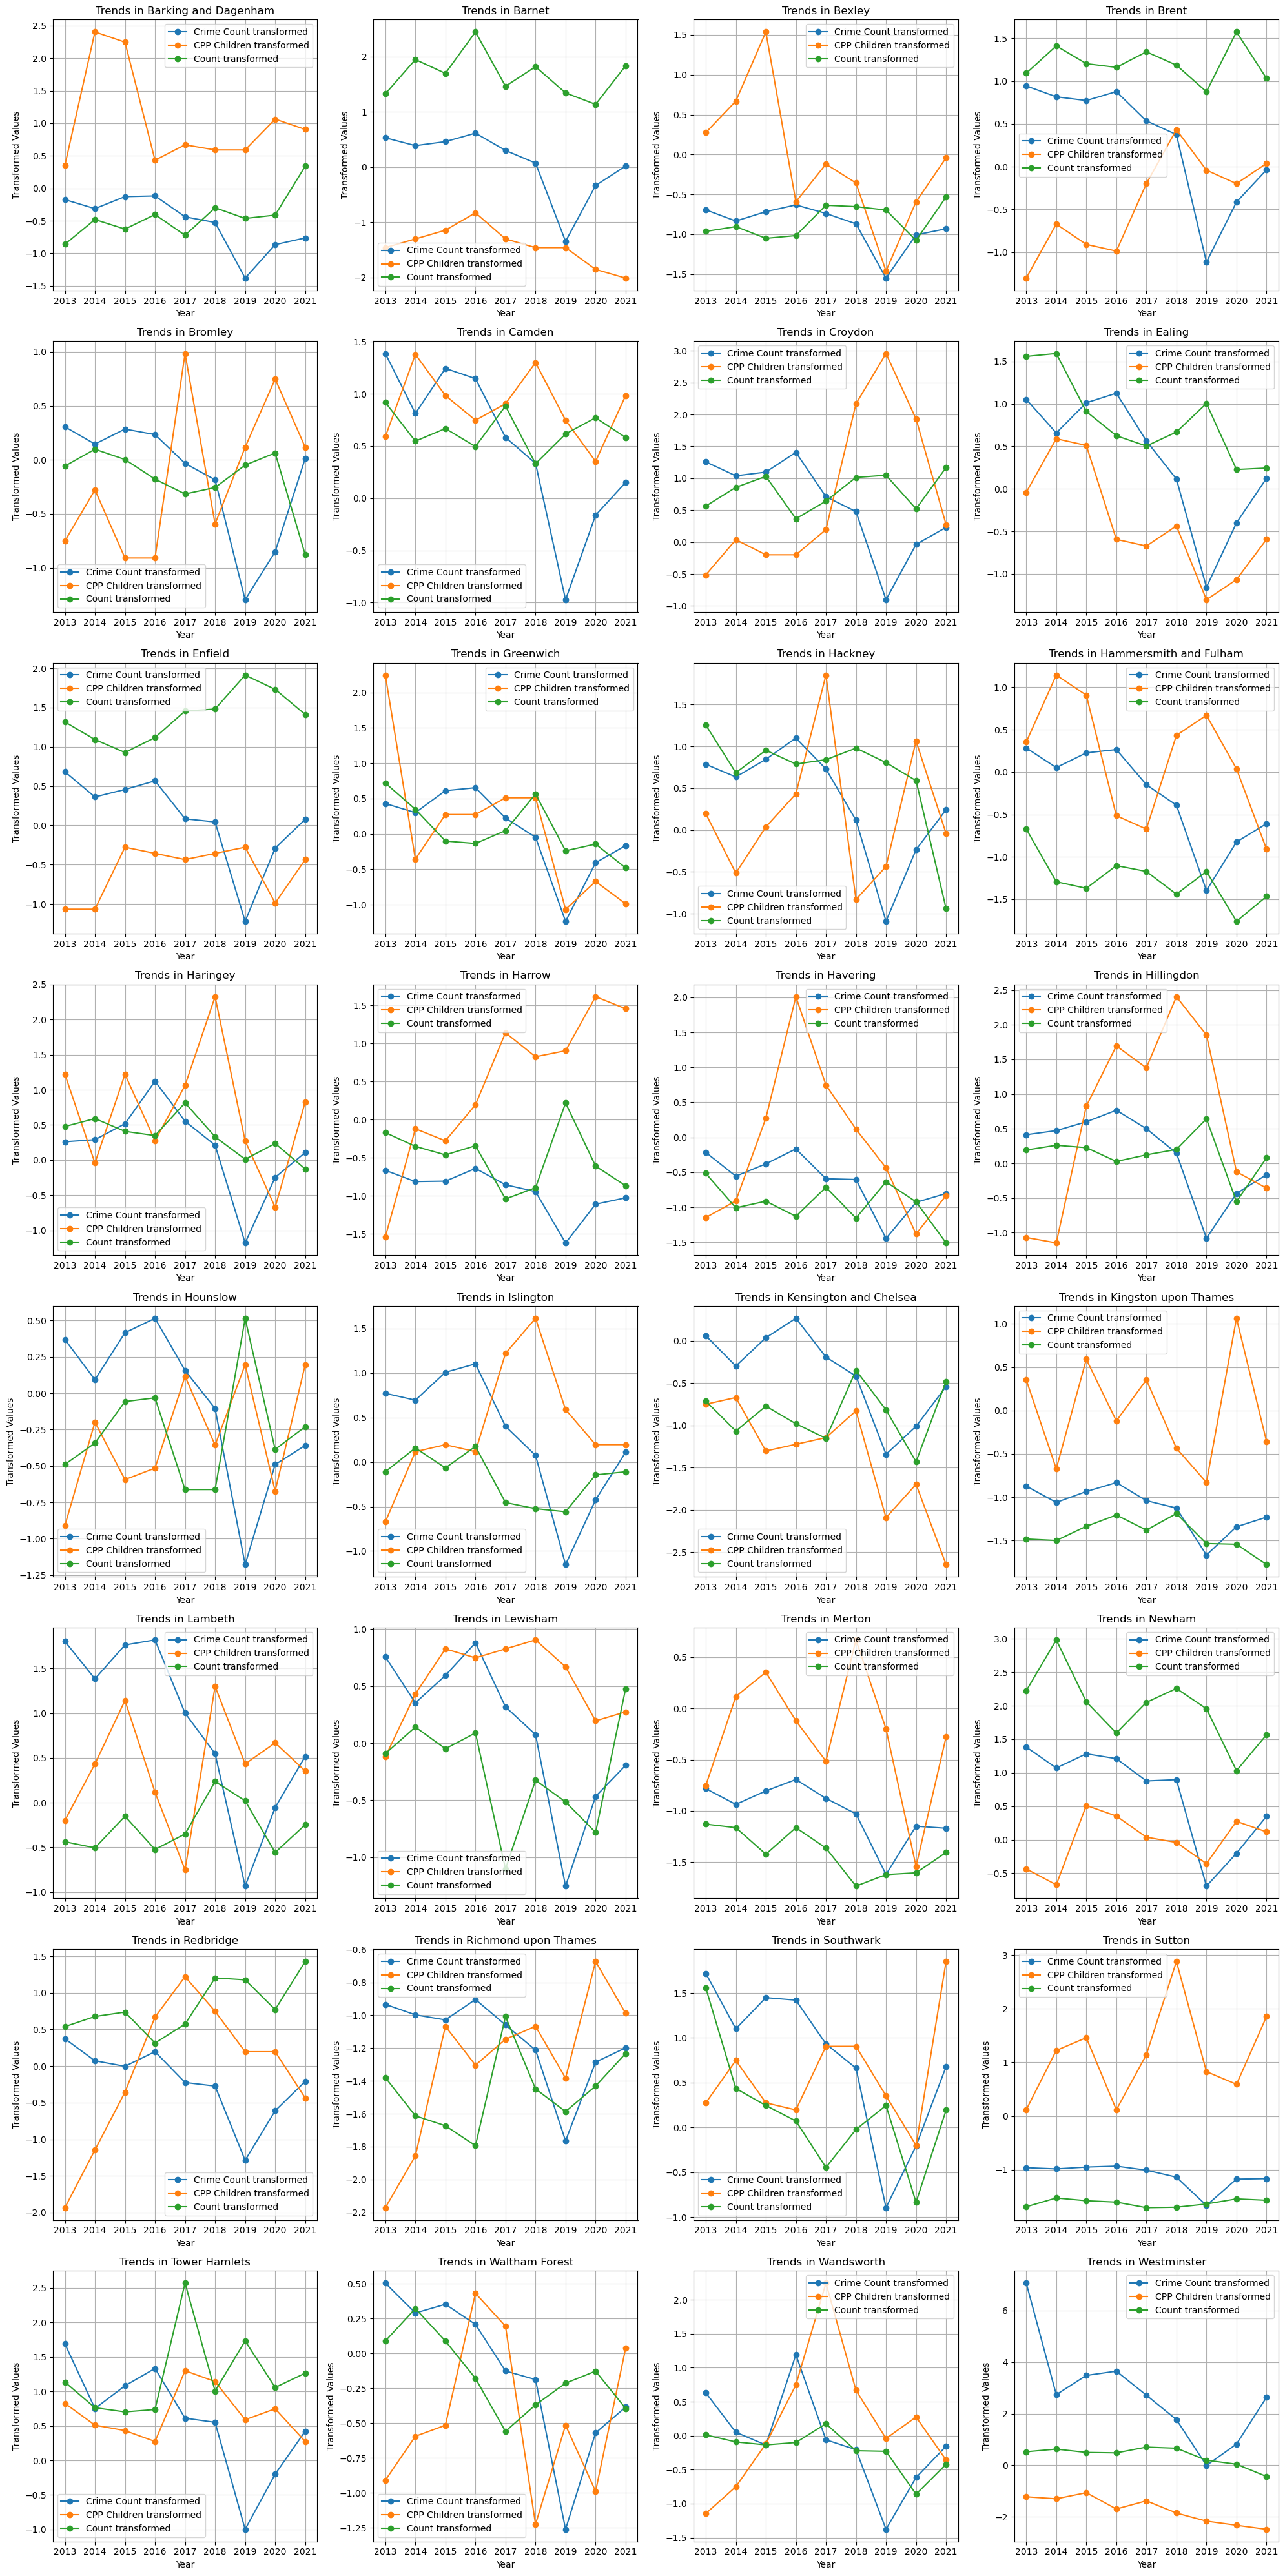

In [137]:
import matplotlib.pyplot as plt

# Define the attributes and areas
attributes = ["Crime Count transformed", "CPP Children transformed", "Count transformed"]
areas = merged_data['Area'].unique()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))  # Adjust subplot grid to fit 32 areas
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop through each area and plot the attributes
for i, area in enumerate(areas):
    area_data = merged_data[merged_data['Area'] == area]
    ax = axes[i]  # Select the appropriate subplot

    # Plot each attribute
    for attribute in attributes:
        ax.plot(area_data['Year'], area_data[attribute], label=attribute, marker='o', linestyle='-')

    # Set the title to the area name and add a legend
    ax.set_title(f'Trends in {area}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transformed Values')
    ax.legend()
    ax.grid(True)

# Hide any unused axes if there are fewer than 32 areas
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [138]:
merged_data

Code                  Area  Year  CPP Children  Count  Crime ID  \
0    00AB  Barking and Dagenham  2013            50  30700     11334   
1    00AC                Barnet  2013            27  56000     15443   
2    00AD                Bexley  2013            49  29500      8295   
3    00AE                 Brent  2013            29  53300     17862   
4    00AF               Bromley  2013            36  40000     14135   
..    ...                   ...   ...           ...    ...       ...   
283  00BF                Sutton  2021            69  22500      5536   
284  00BG         Tower Hamlets  2021            49  55300     14825   
285  00BH        Waltham Forest  2021            46  36100     10104   
286  00BJ            Wandsworth  2021            41  35800     11444   
287  00BK           Westminster  2021            14  35600     27748   

     Count transformed  CPP Children transformed  Crime Count transformed  
0            -0.860714                  0.353443                -0.173819  
1             1.325012                 -1.461446                 0.529478  
2            -0.964384                  0.274535                -0.693975  
3             1.091753                 -1.303629                 0.943514  
4            -0.057265                 -0.751272                 0.305601  
..                 ...                       ...                      ...  
283          -1.569131                  1.852699                -1.166206  
284           1.264538                  0.274535                 0.423701  
285          -0.394195                  0.037810                -0.384346  
286          -0.420113                 -0.356731                -0.154991  
287          -0.437391                 -2.487252                 2.635604  

[288 rows x 9 columns]

In [139]:
merged_data.to_csv("CPP_CrimeCount_InactiveCount.csv")